In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# eda_final_project

## Duomenys

Duomenų šaltinis https://www.registrucentras.lt/p/1094. 

1. Parsisiųsti 2020 ir 2021 įmonių “Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – balanso ataskaitos” ir “Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – pelno (nuostolių) ataskaitos” duomenis. 

1. Apskaičiuoti vidutinias reikšmes “pelnas_pries_apmokestinima” ir “nuosavas_kapitalas” laukų kiekvienai juridinio asmens formai (Uždaroji akcinė bendrovė, Mažoji bendrija, etc.) už visą laikotarpį. 

2. Atrinkti įmones, kurių “nuosavas_kapitalas” buvo didesnis negu nuosavo kapitalo mediana 2020 ir 2021 metais.  

3. Atvaizduoti juridinių asmenų formos ir statuso pasiskirstymą kiekvienais metais. 

4. Kiekvienai įmonei apskaičiuoti tendenciją. Jei “grynasis_pelnas” + “nuosavas_kapitalas” 2021 metais buvo didesnis už 2020 metais deklaruotą, tai tendencija “teigiama”, jei ne - “neigiama”. Atvaizduoti tendencijos duomenis grafiškai. 

5. Surasti įmones, kurios 2020 vykdė veiklą, o 2021 - bankrutavo. Bankrutavusių įmonių statusai: “Bankrutavęs”, “Bankrutuojantis”, “Išregistruotas”, “Inicijuojamas likvidavimas”, “Likviduojamas”, “Likviduojamas dėl bankroto”. Kokia bankrutavusių įmonių “nuosavas_kapitalas” suma ir “grynasis_pelnas” suma 2021 metais? Palyginti šias sumas su veikiančių įmonių atitinkamomis sumomis. 

6. Sukurti naują stulpelį “turtas”, kuris skaičiuojamas sudedant “trumpalaikis_turtas” ir “ilgalaikis_turtas”. 

7. Suskirstyti įmones į 5 grupes pagal lauką “turtas”. Palyginti kaip šios grupės keičiasi 2020 ir 2021 metais. Palyginimą atvaizduoti grafiškai. 

8. Surasti top100 pelningiausias įmones pagal “grynasis pelnas” ir top100 įmones kurių “nuosavas kapitalas” didžiausias. Ar yra sutampančių įmonių šiuose sąrašuose? Skaičiuojant topus imti viso laikotarpio įmones. 

9. Ar topai iš 9 užduoties skiriasi 2020 ir 2021 metais? Kurios įmonės iškrenta iš topų 2021 metais? 

In [183]:
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>

In [42]:
# https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-pandas-aggregation-results
pd.set_option("display.float_format", lambda x: "%.2f" % x)

<IPython.core.display.Javascript object>

In [4]:
## got an error while downloading online csv data. OSX
## quick fix
## https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

<IPython.core.display.Javascript object>

# 1 
Parsisiųsti 2020 ir 2021 įmonių “Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – balanso ataskaitos” ir “Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – pelno (nuostolių) ataskaitos” duomenis.

In [5]:
balance_20 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2020.csv"
)
balance_21 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2021.csv"
)
pl_20 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2020.csv"
)
pl_21 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2021.csv"
)

<IPython.core.display.Javascript object>

In [6]:
balance_20.shape, balance_21.shape, pl_20.shape, pl_21.shape

((106318, 18), (120850, 18), (96616, 17), (110227, 17))

<IPython.core.display.Javascript object>

# 2 
Apskaičiuoti vidutinias reikšmes “pelnas_pries_apmokestinima” ir “nuosavas_kapitalas” laukų kiekvienai juridinio asmens formai (Uždaroji akcinė bendrovė, Mažoji bendrija, etc.) už visą laikotarpį.

In [7]:
balance_20.form_pav.value_counts(dropna=False)

Uždaroji akcinė bendrovė                    76370
Mažoji bendrija                             13196
Asociacija                                   9073
Viešoji įstaiga                              5324
Individuali įmonė                             677
Labdaros ir paramos fondas                    598
Žemės ūkio bendrovė                           401
Kooperatinė bendrovė                          334
Akcinė bendrovė                               245
Komanditinė ūkinė bendrija                     39
Savivaldybės įmonė                             24
Užsienio juridinio asmens filialas             16
Valstybės įmonė                                13
Tikroji ūkinė bendrija                          4
Biudžetinė įstaiga                              2
Bendrija                                        1
Lietuvos prekyb.,pramon. rūmų asociacija        1
Name: form_pav, dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# nuosavas_kapitalas
nuosavas_kapitalas = balance_20[["obj_kodas", "nuosavas_kapitalas"]]

<IPython.core.display.Javascript object>

In [9]:
nuosavas_kapitalas.shape

(106318, 2)

<IPython.core.display.Javascript object>

In [10]:
# form_pav,  pelnas_pries_apmokestinima
pelnas_pries_apmokestinima = pl_20[
    ["obj_kodas", "form_pav", "pelnas_pries_apmokestinima"]
]

<IPython.core.display.Javascript object>

In [11]:
pelnas_pries_apmokestinima.shape

(96616, 3)

<IPython.core.display.Javascript object>

In [12]:
balance_20_set = set(balance_20.obj_kodas)
pl_20_set = set(pl_20.obj_kodas)

len(pl_20_set.difference(balance_20_set)), len(balance_20_set.difference(pl_20_set))

(0, 8120)

<IPython.core.display.Javascript object>

In [13]:
# we take intersection and ignore companies that do not have profit loss statement.
pelnas_pries_apmokestinima.merge(nuosavas_kapitalas, on="obj_kodas", how="inner").shape

(129210, 4)

<IPython.core.display.Javascript object>

In [14]:
# we see there are duplicates !!!!

<IPython.core.display.Javascript object>

In [15]:
balance_20.obj_kodas.value_counts().iloc[:3]

168970870    16
145496790    16
135994223    15
Name: obj_kodas, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
balance_20[balance_20.laikotarpis_nuo == "2019-01-01"].obj_kodas.value_counts()

304127368    1
304895492    1
302583362    1
303445421    1
124665536    1
            ..
177218596    1
151484255    1
125416121    1
302756355    1
303778867    1
Name: obj_kodas, Length: 86828, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
# we filter out duplicates(?) by choosing laikotarpis_nuo == "2019-01-01". This requires inside knowledge about balance sheets.
nuosavas_kapitalas = balance_20[balance_20.laikotarpis_nuo == "2019-01-01"][
    ["obj_kodas", "nuosavas_kapitalas"]
]

<IPython.core.display.Javascript object>

In [18]:
pelnas_pries_apmokestinima = pl_20[pl_20.laikotarpis_nuo == "2019-01-01"][
    ["obj_kodas", "form_pav", "pelnas_pries_apmokestinima"]
]

<IPython.core.display.Javascript object>

In [19]:
pelnas_pries_apmokestinima.obj_kodas.value_counts()  ## no duplicates.

304781777    1
111733617    1
302794270    1
302664106    1
300506602    1
            ..
110461363    1
303336094    1
304040760    1
300572972    1
173110025    1
Name: obj_kodas, Length: 79433, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
nuosavas_kapitalas.shape, pelnas_pries_apmokestinima.shape

((86828, 2), (79433, 3))

<IPython.core.display.Javascript object>

In [21]:
# we drop nan and use inner merge
merged = nuosavas_kapitalas.merge(
    pelnas_pries_apmokestinima, on="obj_kodas", how="inner"
)

<IPython.core.display.Javascript object>

In [22]:
year_20_result = merged.groupby('form_pav').agg({'obj_kodas':'count', 
                         'nuosavas_kapitalas':'mean', 
                         'pelnas_pries_apmokestinima':'mean', }).apply(round).rename(columns=dict(obj_kodas='count'))


<IPython.core.display.Javascript object>

In [23]:
year_20_result

,count,nuosavas_kapitalas,pelnas_pries_apmokestinima
form_pav,,,
Akcinė bendrovė,234,38071183.0,2949222.0
Asociacija,1984,15481.0,65.0
Biudžetinė įstaiga,2,141074.0,16242.0
Individuali įmonė,562,191930.0,19217.0
Komanditinė ūkinė bendrija,23,1442068.0,711898.0
Kooperatinė bendrovė,317,698003.0,36818.0
Labdaros ir paramos fondas,91,10945.0,141.0
"Lietuvos prekyb.,pramon. rūmų asociacija",1,64491.0,NaN
Mažoji bendrija,8562,18645.0,7669.0


<IPython.core.display.Javascript object>

In [24]:
## year 2021

<IPython.core.display.Javascript object>

In [25]:
nuosavas_kapitalas = balance_21[balance_21.laikotarpis_nuo == "2020-01-01"][
    ["obj_kodas", "nuosavas_kapitalas"]
]
pelnas_pries_apmokestinima = pl_21[pl_21.laikotarpis_nuo == "2020-01-01"][
    ["obj_kodas", "form_pav", "pelnas_pries_apmokestinima"]
]
## check for duplicates.
nuosavas_kapitalas.shape, pelnas_pries_apmokestinima.shape, len(
    set(nuosavas_kapitalas.obj_kodas)
), len(set(pelnas_pries_apmokestinima.obj_kodas))
#  No duplicates!!

((94600, 2), (86471, 3), 94600, 86471)

<IPython.core.display.Javascript object>

In [26]:
merged = nuosavas_kapitalas.merge(
    pelnas_pries_apmokestinima, on="obj_kodas", how="inner"
)
year_21_result = merged.groupby('form_pav').agg({'obj_kodas':'count', 
                         'nuosavas_kapitalas':'mean', 
                         'pelnas_pries_apmokestinima':'mean', }).apply(round).rename(columns=dict(obj_kodas='count'))


<IPython.core.display.Javascript object>

In [27]:
year_21_result

,count,nuosavas_kapitalas,pelnas_pries_apmokestinima
form_pav,,,
Akcinė bendrovė,227,44076779.0,2957779.0
Asociacija,2087,134370.0,-735.0
Individuali įmonė,554,140439.0,15009.0
Komanditinė ūkinė bendrija,29,3063515.0,365933.0
Kooperatinė bendrovė,318,771014.0,81070.0
Labdaros ir paramos fondas,104,17065.0,155.0
Mažoji bendrija,12335,20725.0,9023.0
Savivaldybės įmonė,19,3722859.0,20645.0
Tikroji ūkinė bendrija,6,173723.0,11852.0


<IPython.core.display.Javascript object>

In [28]:
## additional task -> write a function do not repeat the code.

<IPython.core.display.Javascript object>

In [29]:
## additional tasks
# 1. add to a single table that holds hieararchical structure.

<IPython.core.display.Javascript object>

In [177]:
merged_result = pd.concat(
    {"2020": year_20_result, "2021": year_21_result}, axis=1
).fillna(0)

<IPython.core.display.Javascript object>

In [178]:
merged_result

2020                     \
                                          count nuosavas_kapitalas   
form_pav                                                             
Akcinė bendrovė                             234        38071183.00   
Asociacija                                 1984           15481.00   
Biudžetinė įstaiga                            2          141074.00   
Individuali įmonė                           562          191930.00   
Komanditinė ūkinė bendrija                   23         1442068.00   
Kooperatinė bendrovė                        317          698003.00   
Labdaros ir paramos fondas                   91           10945.00   
Lietuvos prekyb.,pramon. rūmų asociacija      1           64491.00   
Mažoji bendrija                            8562           18645.00   
Savivaldybės įmonė                           18         3891527.00   
Tikroji ūkinė bendrija                        4          470602.00   
Uždaroji akcinė bendrovė                  64401          582191.00   
Užsienio juridinio asmens filialas           13         -296372.00   
Valstybės įmonė                              13        94670868.00   
Viešoji įstaiga                            2868           36791.00   
Žemės ūkio bendrovė                         340         1497443.00   

                                                                        2021  \
                                         pelnas_pries_apmokestinima    count   
form_pav                                                                       
Akcinė bendrovė                                          2949222.00   227.00   
Asociacija                                                    65.00  2087.00   
Biudžetinė įstaiga                                         16242.00     0.00   
Individuali įmonė                                          19217.00   554.00   
Komanditinė ūkinė bendrija                                711898.00    29.00   
Kooperatinė bendrovė                                       36818.00   318.00   
Labdaros ir paramos fondas                                   141.00   104.00   
Lietuvos prekyb.,pramon. rūmų asociacija                       0.00     0.00   
Mažoji bendrija                                             7669.00 12335.00   
Savivaldybės įmonė                                         86824.00    19.00   
Tikroji ūkinė bendrija                                   -103957.00     6.00   
Uždaroji akcinė bendrovė                                  109280.00 67280.00   
Užsienio juridinio asmens filialas                         98792.00    14.00   
Valstybės įmonė                                          5804726.00    13.00   
Viešoji įstaiga                                             9029.00  3136.00   
Žemės ūkio bendrovė                                        44135.00   349.00   

                                                             \
                                         nuosavas_kapitalas   
form_pav                                                      
Akcinė bendrovė                                 44076779.00   
Asociacija                                        134370.00   
Biudžetinė įstaiga                                     0.00   
Individuali įmonė                                 140439.00   
Komanditinė ūkinė bendrija                       3063515.00   
Kooperatinė bendrovė                              771014.00   
Labdaros ir paramos fondas                         17065.00   
Lietuvos prekyb.,pramon. rūmų asociacija               0.00   
Mažoji bendrija                                    20725.00   
Savivaldybės įmonė                               3722859.00   
Tikroji ūkinė bendrija                            173723.00   
Uždaroji akcinė bendrovė                          785954.00   
Užsienio juridinio asmens filialas               -173293.00   
Valstybės įmonė                                 87544165.00   
Viešoji įstaiga                                    41667.00   
Žemės ūkio bendrovė                              1672066.

<IPython.core.display.Javascript object>

# 3
Atrinkti įmones, kurių “nuosavas_kapitalas” buvo didesnis negu nuosavo kapitalo mediana 2020 ir 2021 metais.

`pasiulymas mediana UAB ir atrinkti UAB imones.`
`analogiskas pratimas MB`

In [32]:
uab_condition_21 = balance_21.form_pav == "Uždaroji akcinė bendrovė"
uab_condition_20 = balance_20.form_pav == "Uždaroji akcinė bendrovė"
laikotarpis_condition_21 = balance_21.laikotarpis_nuo == "2020-01-01"
laikotarpis_condition_20 = balance_20.laikotarpis_nuo == "2019-01-01"

capital_median_21 = balance_21[laikotarpis_condition_21 & uab_condition_21][
    ["obj_kodas", "nuosavas_kapitalas"]
].nuosavas_kapitalas.median()

capital_median_20 = balance_20[laikotarpis_condition_20 & uab_condition_20][
    ["obj_kodas", "nuosavas_kapitalas"]
].nuosavas_kapitalas.median()

<IPython.core.display.Javascript object>

In [35]:
capital_median_20, capital_median_21

(27739.0, 31843.0)

<IPython.core.display.Javascript object>

In [72]:
balance_20[
    laikotarpis_condition_20
    & uab_condition_20
    & (balance_20.nuosavas_kapitalas > capital_median_20)
].sort_values(by="nuosavas_kapitalas").tail(5)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
92897,302489393,"UAB ""ME investicija""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0130,Vidutinių ir didelių įmonių finansinių ataskai...,BST123,BALANSAS,2019-01-01,2019-12-31,2020-06-05,382319766.00,112754219.00,270807863.00,225068719.00,2022-12-01
90259,126168458,LEKSITA UAB,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,2019-01-01,2019-12-31,2020-05-21,556159000.00,NaN,325576000.00,230696000.00,2022-12-01
10090,122351387,"UAB ""Thermo Fisher Scientific Baltics""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0130,Vidutinių ir didelių įmonių finansinių ataskai...,BST123,BALANSAS,2019-01-01,2019-12-31,2020-05-25,835363488.00,40745829.00,102710566.00,775439119.00,2022-12-01
6544,301066547,MAXIMA GRUPĖ UAB,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,2019-01-01,2019-12-31,2020-05-04,1459354000.00,NaN,1803817000.00,10401000.00,2022-12-01
75917,302608755,"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,2019-01-01,2019-12-31,2020-05-12,1658114000.00,NaN,1777890000.00,96465000.00,2022-12-01


<IPython.core.display.Javascript object>

In [73]:
balance_21[
    laikotarpis_condition_21
    & uab_condition_21
    & (balance_21.nuosavas_kapitalas > capital_median_21)
].sort_values(by="nuosavas_kapitalas").tail(5)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
119613,301066547,MAXIMA GRUPĖ UAB,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,2020-01-01,2020-12-31,2021-04-16,1564631000.00,NaN,1987892000.00,18226000.00,2022-12-01
39828,302608755,"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,2020-01-01,2020-12-31,2021-05-20,1950511000.00,NaN,1754522000.00,199991000.00,2022-12-01
16978,305115956,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2020-01-01,2020-12-31,2021-05-31,2950792636.00,1146557923.00,4097345678.00,4881.00,2022-12-01
25845,305115970,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2020-01-01,2020-12-31,2021-05-31,3898038337.00,11480.00,3898047436.00,2381.00,2022-12-01
54243,305115931,"UAB ""Thermo Fisher Scientific Vector Holdings""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2020-01-01,2020-12-31,2021-05-31,3898038496.00,9062.00,3898045213.00,2345.00,2022-12-01


<IPython.core.display.Javascript object>

# 4
Atvaizduoti juridinių asmenų formos ir statuso pasiskirstymą kiekvienais metais.

In [83]:
b20 = (
    balance_20.groupby("form_pav", as_index=False)
    .form_kodas.count()
    .rename(columns={"form_kodas": "2020_count"})
)

<IPython.core.display.Javascript object>

In [84]:
b21 = (
    balance_21.groupby("form_pav", as_index=False)
    .form_kodas.count()
    .rename(columns={"form_kodas": "2021_count"})
)

<IPython.core.display.Javascript object>

<AxesSubplot: >

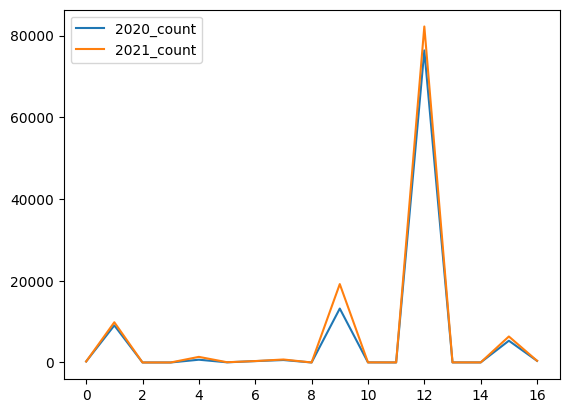

<IPython.core.display.Javascript object>

In [92]:
b20.merge(b21, on="form_pav", how="outer").fillna(0).plot()

In [93]:
import seaborn as sns

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='form_pav', ylabel='2020_count'>

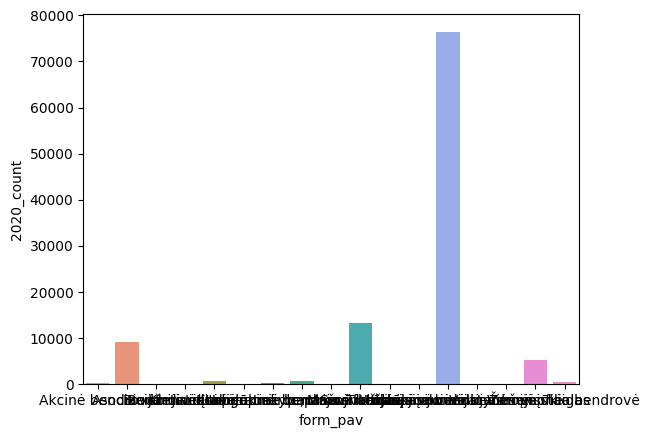

<IPython.core.display.Javascript object>

In [95]:
sns.barplot(data=b20, x="form_pav", y="2020_count")

In [94]:
b20

,form_pav,2020_count
0,Akcinė bendrovė,245
1,Asociacija,9073
2,Bendrija,1
3,Biudžetinė įstaiga,2
4,Individuali įmonė,677
5,Komanditinė ūkinė bendrija,39
6,Kooperatinė bendrovė,334
7,Labdaros ir paramos fondas,598
8,"Lietuvos prekyb.,pramon. rūmų asociacija",1
9,Mažoji bendrija,13196


<IPython.core.display.Javascript object>

# 5 
Kiekvienai įmonei apskaičiuoti tendenciją. Jei “grynasis_pelnas” + “nuosavas_kapitalas” 2021 metais buvo didesnis už 2020 metais deklaruotą, tai tendencija “teigiama”, jei ne - “neigiama”. Atvaizduoti tendencijos duomenis grafiškai.

In [106]:
tend_20 = pl_20[["obj_kodas", "form_pav", "grynasis_pelnas"]].merge(
    balance_20[["obj_kodas", "nuosavas_kapitalas"]]
)

<IPython.core.display.Javascript object>

In [107]:
tend_20["value_20"] = tend_20["grynasis_pelnas"] + tend_20["nuosavas_kapitalas"]
tend_20 = tend_20[["obj_kodas", "form_pav", "value_20"]]

<IPython.core.display.Javascript object>

In [111]:
tend_21 = pl_21[["obj_kodas", "form_pav", "grynasis_pelnas"]].merge(
    balance_21[["obj_kodas", "nuosavas_kapitalas"]]
)
tend_21["value_21"] = tend_21["grynasis_pelnas"] + tend_21["nuosavas_kapitalas"]
tend_21 = tend_21[["obj_kodas", "value_21"]]

<IPython.core.display.Javascript object>

In [113]:
tend = tend_20.merge(tend_21, on="obj_kodas")

<IPython.core.display.Javascript object>

In [115]:
tend["tendencija"] = "neigiama"

<IPython.core.display.Javascript object>

In [117]:
tend.loc[tend.value_21 > tend.value_20, "tendencija"] = "teigiama"

<IPython.core.display.Javascript object>

In [120]:
tend.tendencija.value_counts()

teigiama    59334
neigiama    56351
Name: tendencija, dtype: int64

<IPython.core.display.Javascript object>

# 6
Surasti įmones, kurios 2020 vykdė veiklą, o 2021 - bankrutavo. Bankrutavusių įmonių statusai: “Bankrutavęs”, “Bankrutuojantis”, “Išregistruotas”, “Inicijuojamas likvidavimas”, “Likviduojamas”, “Likviduojamas dėl bankroto”. Kokia bankrutavusių įmonių “nuosavas_kapitalas” suma ir “grynasis_pelnas” suma 2021 metais? Palyginti šias sumas su veikiančių įmonių atitinkamomis sumomis.

In [ ]:
# dirbame tik su MB ir UAB
## veikianti imone = 'Teisinis stat neįregistruotas'
## Bankrutavusi imone = 'Bankrutavęs', 'Bankrutuojantis', 'Išregistruotas', 'Likviduojamas', 'Likviduojamas dėl bankroto', 'Inicijuojamas likvidavimas'

In [186]:
def get_veikianti_bankrutavusi(x):
    veikianti = "Teisinis stat neįregistruotas"
    bankrutavusi = [
        "Bankrutavęs",
        "Bankrutuojantis",
        "Išregistruotas",
        "Likviduojamas",
        "Likviduojamas dėl bankroto",
        "Inicijuojamas likvidavimas",
    ]
    if x == veikianti:
        return "veikianti"
    elif x in bankrutavusi:
        return "bankrutavusi"
    return np.nan


balance_20["veikianti_bankrutavusi"] = balance_20.stat_pav.map(
    get_veikianti_bankrutavusi
)
balance_21["veikianti_bankrutavusi"] = balance_21.stat_pav.map(
    get_veikianti_bankrutavusi
)

<IPython.core.display.Javascript object>

In [213]:
bal_cols = ["obj_kodas", "form_pav", "veikianti_bankrutavusi", "nuosavas_kapitalas"]
pl_cols = ["obj_kodas", "grynasis_pelnas"]
merge_on = "obj_kodas"
mb_uab = ["Mažoji bendrija", "Uždaroji akcinė bendrovė"]
uab_mb_codition_20 = balance_20.form_pav.isin(mb_uab)
uab_mb_codition_21 = balance_21.form_pav.isin(mb_uab)

merged_20 = balance_20[uab_mb_codition_20][bal_cols].merge(pl_20[pl_cols], on=merge_on)
merged_21 = balance_21[uab_mb_codition_21][bal_cols].merge(pl_21[pl_cols], on=merge_on)

<IPython.core.display.Javascript object>

In [221]:
merged = merged_20.merge(merged_21, on=merge_on, suffixes=["_20", "_21"], how="left")

<IPython.core.display.Javascript object>

In [223]:
merged.veikianti_bankrutavusi_20.value_counts(), merged.veikianti_bankrutavusi_21.value_counts(),

(veikianti       125594
 bankrutavusi      8501
 Name: veikianti_bankrutavusi_20, dtype: int64,
 veikianti       105849
 bankrutavusi      3906
 Name: veikianti_bankrutavusi_21, dtype: int64)

<IPython.core.display.Javascript object>

In [224]:
veikianti_bankrutavusi_codition = merged.apply(
    lambda x: (x["veikianti_bankrutavusi_20"] == "veikianti")
    & (x["veikianti_bankrutavusi_21"] == "bankrutavusi"),
    axis=1,
)

<IPython.core.display.Javascript object>

In [227]:
merged[
    merged.veikianti_bankrutavusi_21 == "bankrutavusi"
].veikianti_bankrutavusi_20.value_counts()

bankrutavusi    3906
Name: veikianti_bankrutavusi_20, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
## Nera bankrutavusiu imoniu?!

# 7 
Sukurti naują stulpelį “turtas”, kuris skaičiuojamas sudedant “trumpalaikis_turtas” ir “ilgalaikis_turtas”.

In [127]:
balance_20["turtas"] = (
    balance_20["trumpalaikis_turtas"] + balance_20["ilgalaikis_turtas"]
)

balance_21["turtas"] = (
    balance_21["trumpalaikis_turtas"] + balance_21["ilgalaikis_turtas"]
)

<IPython.core.display.Javascript object>

# 8
Suskirstyti įmones į 5 grupes pagal lauką “turtas”. Palyginti kaip šios grupės keičiasi 2020 ir 2021 metais. Palyginimą atvaizduoti grafiškai.

In [132]:
balance_20.turtas.describe(percentiles=[0.2, 0.4, 0.6, 0.8])

count       104879.00
mean       1082727.26
std       20989512.86
min        -132771.00
20%           2965.00
40%          18960.20
50%          36421.00
60%          68112.20
80%         278432.60
max     3088980000.00
Name: turtas, dtype: float64

<IPython.core.display.Javascript object>

In [162]:
balance_20["turtas_category"] = pd.cut(
    balance_20.turtas,
    bins=[0, 3000, 20000, 35000, 70000, 3_000_000_000],
    labels=["iki 3k", "3k-20k", "20k-35k", "35k-70k", "70k+"],
)

<IPython.core.display.Javascript object>

In [163]:
balance_21["turtas_category"] = pd.cut(
    balance_21.turtas,
    bins=[0, 3000, 20000, 35000, 70000, 3_000_000_000],
    labels=["iki 3k", "3k-20k", "20k-35k", "35k-70k", "70k+"],
)

<IPython.core.display.Javascript object>

In [164]:
b20 = (
    balance_20[["obj_kodas", "turtas_category"]]
    .copy()
    .rename(columns={"turtas_category": "turtas_category_2020"})
)

<IPython.core.display.Javascript object>

In [165]:
b21 = (
    balance_21[["obj_kodas", "turtas_category"]]
    .copy()
    .rename(columns={"turtas_category": "turtas_category_2021"})
)

<IPython.core.display.Javascript object>

In [167]:
b20.merge(b21, on="obj_kodas")

,obj_kodas,turtas_category_2020,turtas_category_2021
0,305217929,iki 3k,iki 3k
1,304127368,iki 3k,iki 3k
2,304759186,70k+,35k-70k
3,191160250,iki 3k,iki 3k
4,304512862,70k+,70k+
...,...,...,...
92673,302564216,70k+,70k+
92674,300613091,70k+,70k+
92675,304213995,35k-70k,35k-70k
92676,302640169,70k+,70k+


<IPython.core.display.Javascript object>

In [ ]:
## palyginimas -> count'as 
## judejimas is vienos kategorijos i kita 

# 9
Surasti top100 pelningiausias įmones pagal “grynasis pelnas” ir top100 įmones kurių “nuosavas kapitalas” didžiausias. Ar yra sutampančių įmonių šiuose sąrašuose? Skaičiuojant topus imti viso laikotarpio įmones.

In [246]:
mb_uab = ["Mažoji bendrija", "Uždaroji akcinė bendrovė"]
uab_mb_codition_20 = balance_20.form_pav.isin(mb_uab)
uab_mb_codition_21 = balance_21.form_pav.isin(mb_uab)

laikotarpis_condition_20 = balance_20.laikotarpis_nuo == "2019-01-01"
laikotarpis_condition_21 = balance_21.laikotarpis_nuo == "2020-01-01"


bal_cols = ["obj_kodas", "obj_pav", "form_pav", "nuosavas_kapitalas"]

<IPython.core.display.Javascript object>

In [250]:
top_capital_20 = (
    balance_20[uab_mb_codition_20 & laikotarpis_condition_20][bal_cols]
    .sort_values("nuosavas_kapitalas", ascending=False)
    .dropna()
    .head(100)
)

<IPython.core.display.Javascript object>

In [255]:
top_capital_21 = (
    balance_21[uab_mb_codition_21 & laikotarpis_condition_21][bal_cols]
    .sort_values("nuosavas_kapitalas", ascending=False)
    .dropna()
    .head(100)
)

<IPython.core.display.Javascript object>

In [251]:
mb_uab = ["Mažoji bendrija", "Uždaroji akcinė bendrovė"]
pl_uab_mb_codition_20 = pl_20.form_pav.isin(mb_uab)
pl_uab_mb_codition_21 = pl_21.form_pav.isin(mb_uab)

pl_laikotarpis_condition_20 = pl_20.laikotarpis_nuo == "2019-01-01"
pl_laikotarpis_condition_21 = pl_20.laikotarpis_nuo == "2020-01-01"


pl_cols = ["obj_kodas", "obj_pav", "form_pav", "grynasis_pelnas"]

<IPython.core.display.Javascript object>

In [252]:
top_profit_20 = (
    pl_20[pl_uab_mb_codition_20 & pl_laikotarpis_condition_20][pl_cols]
    .sort_values("grynasis_pelnas", ascending=False)
    .dropna()
    .head(100)
)

<IPython.core.display.Javascript object>

In [256]:
top_profit_21 = (
    pl_21[pl_uab_mb_codition_21 & pl_laikotarpis_condition_21][pl_cols]
    .sort_values("grynasis_pelnas", ascending=False)
    .dropna()
    .head(100)
)

<IPython.core.display.Javascript object>

In [262]:
top_profit_21

,obj_kodas,obj_pav,form_pav,grynasis_pelnas
56566,121411842,"Uždaroji akcinė bendrovė ""RIVILĖ""",Uždaroji akcinė bendrovė,1029987.00
27806,304437648,UAB GTV Investments,Uždaroji akcinė bendrovė,986852.00
71582,110199943,"UAB ""ALSO Lietuva""",Uždaroji akcinė bendrovė,973000.00
8679,303832418,"UAB ""Limoja""",Uždaroji akcinė bendrovė,278149.00
28800,301879586,"UAB ""Baltesa""",Uždaroji akcinė bendrovė,220807.00
...,...,...,...,...
61174,303543552,"UAB ""Consultada""",Uždaroji akcinė bendrovė,-261.00
79486,300670758,"UAB ""Vinorda""",Uždaroji akcinė bendrovė,-341.00
15721,304474479,"UAB ""Statinių statybos valdymas""",Uždaroji akcinė bendrovė,-466.00
70573,305638725,"MB ""Grilinta""",Mažoji bendrija,-613.00


<IPython.core.display.Javascript object>

In [257]:
best_20 = top_capital_20.merge(top_profit_20, on="obj_kodas")

<IPython.core.display.Javascript object>

In [258]:
best_21 = top_capital_21.merge(top_profit_21, on="obj_kodas")

<IPython.core.display.Javascript object>

In [259]:
best_20

,obj_kodas,obj_pav_x,form_pav_x,nuosavas_kapitalas,obj_pav_y,form_pav_y,grynasis_pelnas
0,122351387,"UAB ""Thermo Fisher Scientific Baltics""",Uždaroji akcinė bendrovė,835363488.00,"UAB ""Thermo Fisher Scientific Baltics""",Uždaroji akcinė bendrovė,246597137.00
1,302489393,"UAB ""ME investicija""",Uždaroji akcinė bendrovė,382319766.00,"UAB ""ME investicija""",Uždaroji akcinė bendrovė,65718272.00
2,111660489,UAB Teva Baltics,Uždaroji akcinė bendrovė,360041379.00,UAB Teva Baltics,Uždaroji akcinė bendrovė,40401074.00
3,123033512,MAXIMA LT UAB,Uždaroji akcinė bendrovė,264546000.00,MAXIMA LT UAB,Uždaroji akcinė bendrovė,83641000.00
4,110688998,"UAB ""Bitė Lietuva""",Uždaroji akcinė bendrovė,252973000.00,"UAB ""Bitė Lietuva""",Uždaroji akcinė bendrovė,33429000.00
5,126142011,"Uždaroji akcinė bendrovė ""NEO GROUP""",Uždaroji akcinė bendrovė,225969009.00,"Uždaroji akcinė bendrovė ""NEO GROUP""",Uždaroji akcinė bendrovė,24270205.00
6,111471645,"UAB ""TELE2""",Uždaroji akcinė bendrovė,181159000.00,"UAB ""TELE2""",Uždaroji akcinė bendrovė,56625000.00
7,156673480,"UAB koncernas ""ACHEMOS GRUPĖ""",Uždaroji akcinė bendrovė,180519000.00,"UAB koncernas ""ACHEMOS GRUPĖ""",Uždaroji akcinė bendrovė,20122000.00
8,234376520,"Uždaroji akcinė bendrovė ""Kesko Senukai Lithua...",Uždaroji akcinė bendrovė,153243537.00,"Uždaroji akcinė bendrovė ""Kesko Senukai Lithua...",Uždaroji akcinė bendrovė,18683361.00
9,111543781,"Uždaroji akcinė bendrovė ""BALTISCHES HAUS""",Uždaroji akcinė bendrovė,147498367.00,"Uždaroji akcinė bendrovė ""BALTISCHES HAUS""",Uždaroji akcinė bendrovė,11654436.00


<IPython.core.display.Javascript object>

In [266]:
set(top_profit_21.obj_kodas).intersection(set(top_capital_21.obj_kodas))

set()

<IPython.core.display.Javascript object>

# 10
Ar topai iš 9 užduoties skiriasi 2020 ir 2021 metais? Kurios įmonės iškrenta iš topų 2021 metais?

In [277]:
capital_drop_outs_21 = []
for i in top_capital_20.obj_pav:
    if i not in top_capital_21.obj_pav:
        capital_drop_outs_21.append(i)

<IPython.core.display.Javascript object>

In [278]:
capital_drop_outs_21

['Uždaroji akcinė bendrovė "Vilniaus prekyba"',
 'MAXIMA GRUPĖ UAB',
 'UAB "Thermo Fisher Scientific Baltics"',
 'LEKSITA UAB',
 'UAB "ME investicija"',
 'EUROAPOTHECA UAB',
 'NVP PROJEKTAI UAB',
 'PATRIA HOLDINGS UAB',
 'ENTARAS UAB',
 'UAB Teva Baltics',
 'MAXIMA LT UAB',
 'UAB "Bitė Lietuva"',
 'OZO TURTAS UAB',
 'Uždaroji akcinė bendrovė "NEO GROUP"',
 'VISAS UAB',
 'UAB "TELE2"',
 'GALIO GROUP UAB',
 'UAB koncernas "ACHEMOS GRUPĖ"',
 'UAB "EPSO-G"',
 '"Swedbank lizingas" UAB',
 'UAB "Lag&d"',
 'TAIKOS TURTAS UAB',
 'UAB "ICOR"',
 'Uždaroji akcinė bendrovė "Kesko Senukai Lithuania"',
 'Uždaroji akcinė bendrovė "BALTISCHES HAUS"',
 'UAB "SANITEX"',
 'UAB "ŠVYTURYS-UTENOS ALUS"',
 'UAB "Consul Trade House"',
 'UAB "VG HOLDING"',
 'Uždaroji akcinė bendrovė "VILNIAUS VANDENYS"',
 'GALIO ASSET MANAGEMENT UAB',
 'Uždaroji akcinė bendrovė "Kauno vandenys"',
 'UAB "Panorama LT"',
 'UAB "Hanner"',
 'UAB "MV GROUP Asset Management"',
 'UAB "Consul Development"',
 'NDX Group UAB',
 'UAB "Cons

<IPython.core.display.Javascript object>

In [275]:
profit_drop_outs_21 = []
for i in top_profit_20.obj_pav:
    if i not in top_profit_21.obj_pav:
        profit_drop_outs_21.append(i)

<IPython.core.display.Javascript object>

In [276]:
profit_drop_outs_21

['UAB "Thermo Fisher Scientific Baltics"',
 'MAXIMA LT UAB',
 'UAB "ME investicija"',
 'UAB "TELE2"',
 'UAB "ERA Family"',
 'Technopolis Lietuva UAB',
 'UAB Teva Baltics',
 'UAB "Bitė Lietuva"',
 'UAB "SCT Lubricants"',
 'UAB "Schage Real Estate"',
 'Uždaroji akcinė bendrovė "NEO GROUP"',
 'Uždaroji akcinė bendrovė "VAKARŲ MEDIENOS GRUPĖ"',
 'UAB "Panorama LT"',
 'UAB "Yukon Advanced Optics Worldwide"',
 'UAB "SANITEX"',
 'Light Conversion UAB',
 'UAB koncernas "ACHEMOS GRUPĖ"',
 'UŽDAROJI AKCINĖ BENDROVĖ "LIETPAK"',
 'Uždaroji akcinė bendrovė BIRIŲ KROVINIŲ TERMINALAS',
 'Uždaroji akcinė bendrovė "Kesko Senukai Lithuania"',
 'Uždaroji akcinė bendrovė "Nemuno banga"',
 'UAB "Avion Express"',
 'UAB Biotechnologinės farmacijos centras "Biotechpharma"',
 'UAB "GetJet Airlines"',
 'UAB "Klaipėdos terminalo grupė"',
 'UAB "ME HOLDING NT"',
 'Uždaroji akcinė bendrovė "LITESKO"',
 'UAB "Narbutas International"',
 'UAB "Green Genius"',
 'UAB "TOP SPORT"',
 'UAB "Sorensen Invest"',
 'UAB "ME Tr

<IPython.core.display.Javascript object>